<a href="https://colab.research.google.com/github/Suguna-M/Task5/blob/main/Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

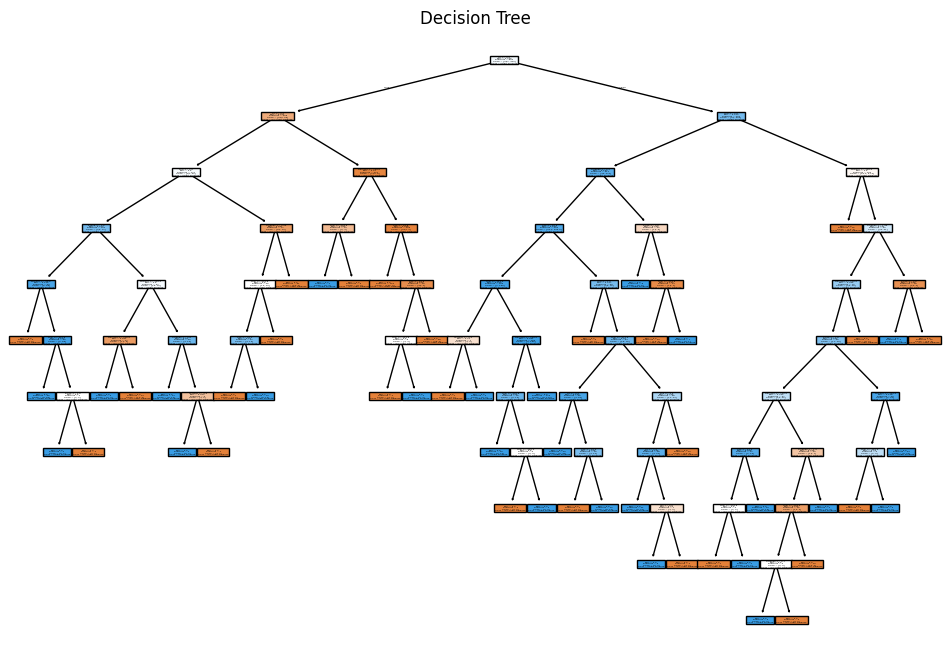

In [2]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/heart.csv')

# Split the dataset into features and target
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Plot Decision Tree
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=X.columns, class_names=['No Heart Disease', 'Heart Disease'], filled=True)
plt.title("Decision Tree")
plt.show()

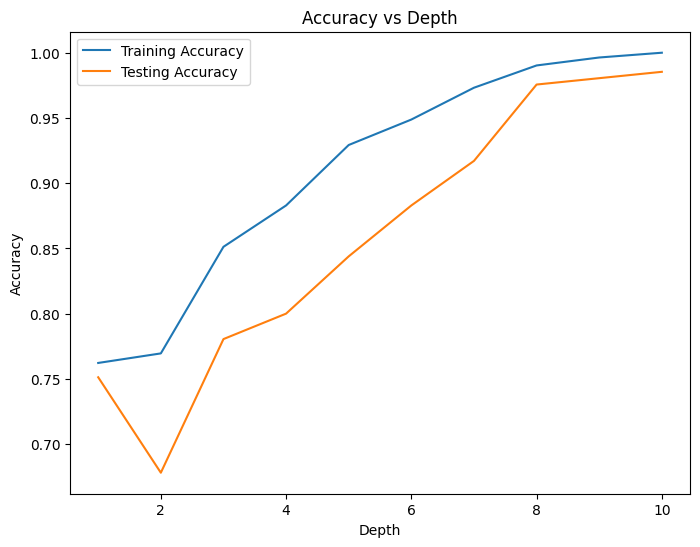

Optimal Depth: 10
Accuracy of Optimal Model: 0.9853658536585366


In [4]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('/content/heart.csv')

# Split the dataset into features and target
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Trees with different depths
train_acc = []
test_acc = []
depths = range(1, 11)

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))

# Plot accuracy vs depth
plt.figure(figsize=(8,6))
plt.plot(depths, train_acc, label='Training Accuracy')
plt.plot(depths, test_acc, label='Testing Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Depth')
plt.legend()
plt.show()

# Find the optimal depth
optimal_depth = depths[np.argmax(test_acc)]
print("Optimal Depth:", optimal_depth)

# Train a Decision Tree with the optimal depth
optimal_clf = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
optimal_clf.fit(X_train, y_train)

# Evaluate the optimal model
y_pred_optimal = optimal_clf.predict(X_test)
print("Accuracy of Optimal Model:", accuracy_score(y_test, y_pred_optimal))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


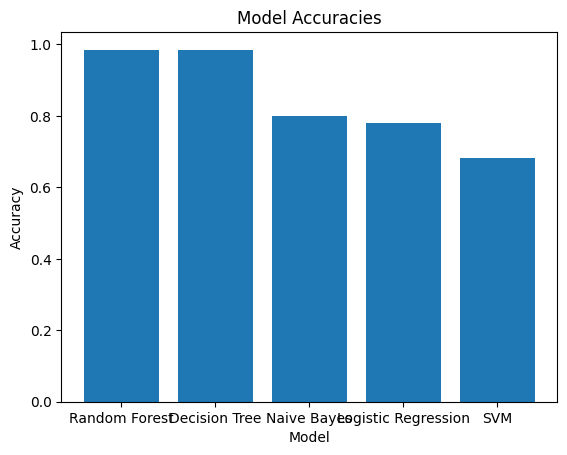

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Load your dataset
X = df.drop('target',axis=1)  # Features
y = df['target']  # Labels

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(random_state=42),
    "SVM": SVC(random_state=42)
}

# Train and evaluate models
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)

# Plot accuracies
plt.bar(accuracies.keys(), accuracies.values())
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracies")
plt.show()

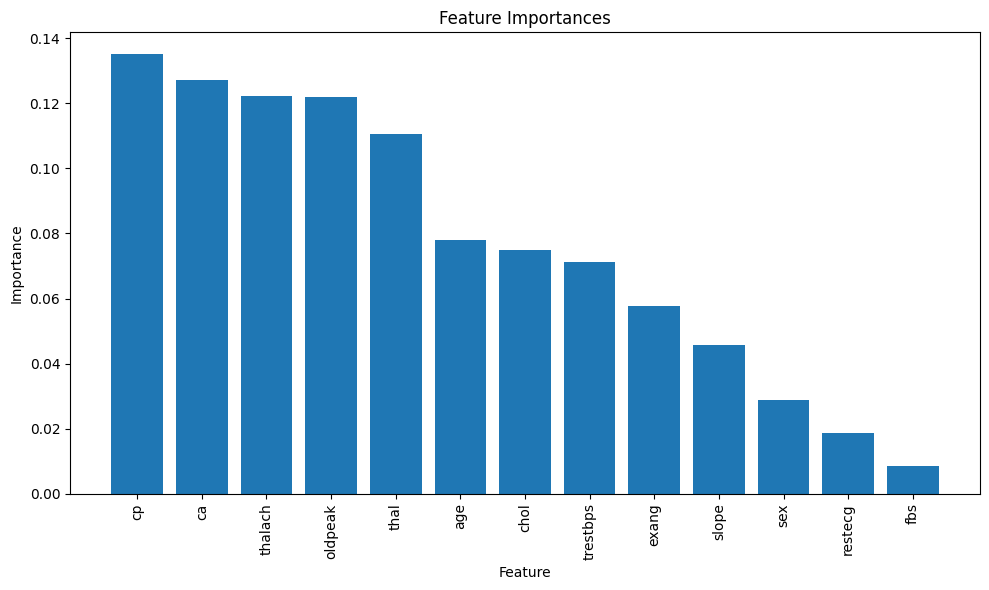

cp: 0.135
ca: 0.127
thalach: 0.122
oldpeak: 0.122
thal: 0.111
age: 0.078
chol: 0.075
trestbps: 0.071
exang: 0.058
slope: 0.046
sex: 0.029
restecg: 0.019
fbs: 0.008


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/heart.csv')

# Split data
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Sort feature importances
indices = np.argsort(feature_importances)[::-1]

# Visualize feature importances
plt.figure(figsize=(10,6))
plt.bar(X.columns[indices], feature_importances[indices])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Print feature importances
for i in indices:
    print(f"{X.columns[i]}: {feature_importances[i]:.3f}")

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Initialize Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Average cross-validation score: 0.9666666666666668
